In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('kodland.csv')
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1


<h3 style="color:magenta">1. Предобработка данных</h3>

<h4>1.1 Поле "Age"</h4>

In [71]:
# Во-первых, проверим пропущенные значения и None
df.isna().sum()

id                        0
age                     150
Дата первого занятия      0
Курс                      0
М2                        0
dtype: int64

<p>В поле "age" 150 пропущенных значений.</p> <p>Рассчитаем средний возраст учеников в зависимости от курса, на котором они обучаются</p>

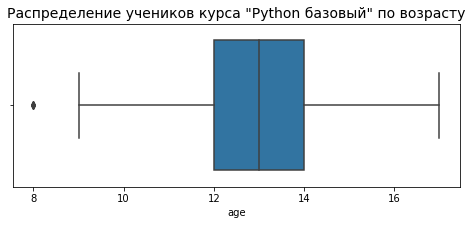

Средний возраст:  12.8


In [72]:
plt.figure(figsize = (8,3))
plt.title('Распределение учеников курса "Python базовый" по возрасту', fontsize = 14)
sns.boxplot(df[df['Курс'] == 'Python Базовый']['age'])
plt.show()
print('Средний возраст: ', np.round(df[df['Курс'] == 'Python Базовый']['age'].mean(), 1))

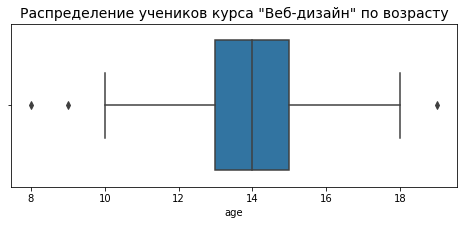

Средний возраст:  13.8


In [73]:
plt.figure(figsize = (8,3))
plt.title('Распределение учеников курса "Веб-дизайн" по возрасту', fontsize = 14)
sns.boxplot(df[df['Курс'] == 'Веб-дизайн']['age'])
plt.show()
print('Средний возраст: ', np.round(df[df['Курс'] == 'Веб-дизайн']['age'].mean(), 1))

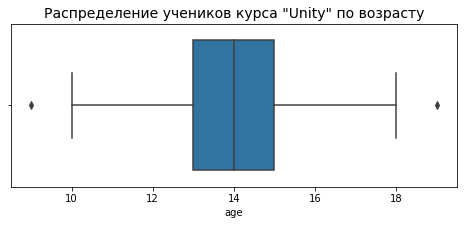

Средний возраст:  14.2


In [74]:
plt.figure(figsize = (8,3))
plt.title('Распределение учеников курса "Unity" по возрасту', fontsize = 14)
sns.boxplot(df[df['Курс'] == 'Unity']['age'])
plt.show()
print('Средний возраст: ', np.round(df[df['Курс'] == 'Unity']['age'].mean(), 1))

<p>Есть выбор из двух вариантов работы с пропущенными значениями: </p>
<ol>
    <li>Заменить их средними значениями возраста по данному курсу(средний возраст был получен выше)</li>
    <li>Удалить строки с пропущенным значением возраста</li>
    
</ol>
<p>Первый вариант хорош для построения модели. Однако, для данной задачи лучше подойдет второй вариант. Поэтому следующий шаг - удаление ненужных строк</p>

<h4>Удалим строки с пропущенным значением возраста</h4>

In [75]:
# Удаление строк с пропущенным возрастом  
df = df.drop(df[df['age'].isna()].index)

In [76]:
# Посмотрим на результат 
df.isna().sum()

id                      0
age                     0
Дата первого занятия    0
Курс                    0
М2                      0
dtype: int64

Пропущенных значений не осталось

<h4>1.2 Поле "Дата первого занятия"</h4>


Преобразуем это поле в формат datetime

In [77]:
df['Дата первого занятия'] = pd.to_datetime(df['Дата первого занятия'], dayfirst = True)

In [78]:
# Проверим, изменился ли тип
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2022 non-null   int64         
 1   age                   2022 non-null   float64       
 2   Дата первого занятия  2022 non-null   datetime64[ns]
 3   Курс                  2022 non-null   object        
 4   М2                    2022 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 94.8+ KB


<h3 style="color:magenta">2. Анализ оттока по курсу</h3>

По условию задания - датасет составлен 1 апреля. Если считать, что датасет составлен с утра, то первое занятие 2 модуля успели посетить те ученики, у которых первое занятие было не позже 3 марта.
Ученики, у которых первое занятие 4 марта и позже, в анализе оттока не учавствуют. Следовательно, будет целесообразно сократить датасет

<h4>2.1. Подготовка данных для анализа</h4>

In [79]:
# Сортировка датасета по дате
df = df.sort_values(by = 'Дата первого занятия')

In [80]:
# Удаляю строки, соответствующие детям, не успевшим дойти до 2 модуля
df = df.loc[df['Дата первого занятия'] < '2021-03-03']
print(f'После сортировки из 2172 строк в датасете осталось {len(df)} строк')

После сортировки из 2172 строк в датасете осталось 1043 строк


Создам 3 подвыборки(для каждого курса), чтобы узнать отток по каждой

In [81]:
# Подвыборка по python
df_py = df[df['Курс'] == 'Python Базовый']
print('размер датасета по курсу python: ', df_py.shape, '\n')
print('Количество ушедших и оставшихся учеников:\n', df_py['М2'].value_counts())

размер датасета по курсу python:  (751, 5) 

Количество ушедших и оставшихся учеников:
 0    398
1    353
Name: М2, dtype: int64


In [82]:
# Подвыборка по Web-дизайну
df_web = df[df['Курс'] == 'Веб-дизайн']
print('размер датасета по курсу web-дизайна: ', df_web.shape, '\n')
print('Количество ушедших и оставшихся учеников:\n', df_web['М2'].value_counts())

размер датасета по курсу web-дизайна:  (234, 5) 

Количество ушедших и оставшихся учеников:
 1    129
0    105
Name: М2, dtype: int64


In [83]:
# Подвыборка по Unity
df_unity = df[df['Курс'] == 'Unity']
print('размер датасета по курсу Unity: ', df_unity.shape, '\n')
print('Количество ушедших и оставшихся учеников:\n', df_unity['М2'].value_counts())

размер датасета по курсу Unity:  (58, 5) 

Количество ушедших и оставшихся учеников:
 0    35
1    23
Name: М2, dtype: int64


<h4>2.2. Построение графиков</h4>

In [84]:
Courses = ['Python Базовый', 'Веб-дизайн', 'Unity']  # По оси X
module_1 = [len(df_py), len(df_web), len(df_unity)]  # кол-во учеников на первом модуле
module_2 = [df_py['М2'].value_counts()[1], df_web['М2'].value_counts()[1], df_unity['М2'].value_counts()[1]] # на 2 модуле

# список с  процентом оттока для ломанной линии
leave_list = [((len(df_py) - df_py['М2'].value_counts()[1])/len(df_py)) * 100, #(всего учеников/кол-во учеников 2 модуля) * 100
              ((len(df_web) - df_web['М2'].value_counts()[1])/len(df_web)) * 100,
             ((len(df_unity) - df_unity['М2'].value_counts()[1])/len(df_unity)) * 100]

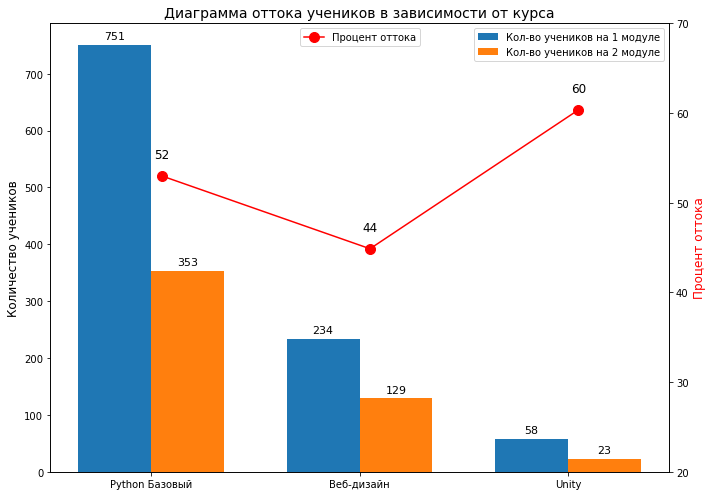

In [85]:
x = np.arange(len(Courses))  # the label locations
width = 0.35  # the width of the bars
y_axis = np.arange(1,100, 10)

# Гистограмма
fig, ax = plt.subplots(figsize = (10,7))
rects1 = ax.bar(x - width/2, module_1, width, label = 'Кол-во учеников на 1 модуле')
rects2 = ax.bar(x + width/2, module_2, width, label = 'Кол-во учеников на 2 модуле')

ax.set_ylabel('Количество учеников' , fontsize = 12)
ax.set_title('Диаграмма оттока учеников в зависимости от курса', fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(Courses)
#ax.set_yticks(module_1 + module_2)
ax.legend()

# Значения для столбцов учеников 1 модуля
for i, v in enumerate(module_1):
    ax.text(i - width/2, v+10, "%d" %v, ha = 'center', fontsize = 11)
# Значения для столбцов учеников 2 модуля
for i, v in enumerate(module_2):
    ax.text(i + width/2, v + 10, "%d" %v, ha = 'center', fontsize = 11)
#ax.bar_label(rects2, padding = 3)

# График процентов оттока
ax2 = ax.twinx()
ax2.plot(x + 0.05, leave_list, c = 'red', marker = 'o', markersize = 10 , label = 'Процент оттока')
ax2.set_ylim(20, 70)
ax2.set_ylabel('Процент оттока', color = 'red', fontsize = 12)
ax2.legend(loc = 'upper center')
#ax2.set_yticks(y_axis)

for i, v in enumerate(leave_list):
    ax2.text(i + 0.05, v+2, "%d" %v, ha = 'center', fontsize = 12)

fig.tight_layout()

plt.show()

<h4>Вывод:</h4>
<p>Из графика видно, что наибольший отток на курсе Unity(60%). Это курс с наименьшим количеством учеников и наибольшим процентом оттока, при том что данный курс самый "возрастной": средний возраст учащихся 14 лет</p>

<h3 style="color:magenta">3. Анализ оттока по возрасту</h3>

<h4>3.1. Группировка данных по возрасту</h4>

In [86]:
# Сначала удалим ненужные выбросы - учеников этого возраста слишком мало, чтобы их оцениватть
df = df.loc[(df['age'] != 8.0)]
df = df.loc[(df['age'] != 19.0)]

<h4>План:</h4>
<ol>
<li>Сгруппируем исходную выборку по возрасту, тем самым посчитав количество учеников в зависимости от возраста</li>
    <li>Сделаем то же самое, только сгруппируем подвыборку из тех учеников, которые перешли на 2 модуль</li>

</ol>

Сгруппируем датасет по возрасту и посчитаем кол-во строк по каждому возрасту:

In [87]:


df.groupby('age').count()['id']

age
9.0       3
10.0     22
11.0    103
12.0    276
13.0    259
14.0    192
15.0    122
16.0     49
17.0     13
Name: id, dtype: int64

Сгруппируем строчки, где М2 = 1,  по возрасту. То есть, посчитаем кол-во человек по каждому возрасту, которые перешли на 2 модуль:

In [88]:
df.where(df['М2'] == 1).groupby('age').count()['id']

age
9.0       2
10.0     11
11.0     47
12.0    121
13.0    134
14.0     95
15.0     61
16.0     27
17.0      7
Name: id, dtype: int64

<h4>3.2. Построение графиков</h4>

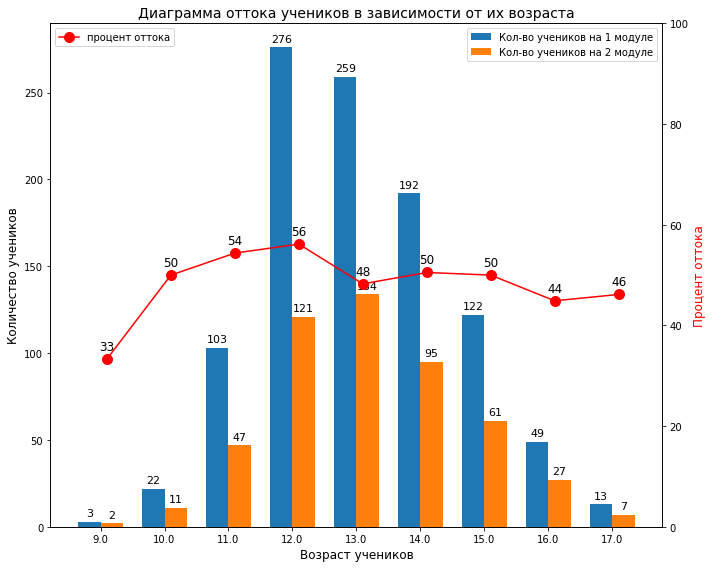

In [89]:
# Ось X и ширина колонки
x = np.arange(len(df.groupby('age').count().index))
width = 0.35

# Списки значений кол-ва учеников по возрастам
module_1_values = []
module_2_values = []

# График
fig, ax = plt.subplots(figsize = (10,8))
# Построение столбцов
cols1 = ax.bar(x - width/2, df.groupby('age').count()['id'], width, label = 'Кол-во учеников на 1 модуле')
cols2 = ax.bar(x + width/2, df.where(df['М2'] == 1).groupby('age').count()['id'], width, label = 'Кол-во учеников на 2 модуле')

# Подписи значений для столбцов с первым модулем
for i, v in enumerate(df.groupby('age').count()['id']):
    module_1_values.append(v)
    ax.text(i - width/2, v+3, "%d" %v, ha = 'center', fontsize = 11)
# Подписи значений для столбцов со вторым модулем
for i, v in enumerate(df.where(df['М2'] == 1).groupby('age').count()['id']):
    module_2_values.append(v)
    ax.text(i + width/2, v+3, "%d" %v, ha = 'center', fontsize = 11)
# Настройки внешнего вида графика
ax.set_title('Диаграмма оттока учеников в зависимости от их возраста', fontsize = 14)
ax.set_xlabel('Возраст учеников', fontsize = 12)
ax.set_ylabel('Количество учеников', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(df.groupby('age').count().index)
ax.legend()

# вторая ось
ax2 = ax.twinx()

#Список процентов оттока по возрастам
leave_percent_list = []
#Заполняем его значениями
for i in range(len(module_1_values)):
    leave_percent = ((module_1_values[i] - module_2_values[i])/module_1_values[i]) * 100
    leave_percent_list.append(leave_percent)
ax2.plot(x + 0.1, leave_percent_list, c = 'red', marker = 'o', markersize = 10, label = 'процент оттока')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Процент оттока', color = 'red', fontsize = 12)
ax2.legend(loc = 'upper left')

# Значения точек
for i, v in enumerate(leave_percent_list):
    ax2.text(i + 0.1, v+1.8, "%d" %v, ha = 'center', fontsize = 12)

fig.tight_layout()
plt.show()

Проверим гипотезу, что дети младше 12 и старше 14 лет чаще уходят в отток.
Если посмотреть на график и посчитать средний процент оттока для 3 возрастных категорий, то увидим, что:
<ul>
    <li>У детей младше 12 лет, средний отток: 45.6%</li>
    <li>У детей 12-14 лет, средний отток: 51.3%</li>
    <li>У детей старше 14 лет, средний отток: 46.6%</li>
</ul>
У детей 12-14 лет средний отток выше, поэтому гипотезу можно опровергнуть